<a href="https://colab.research.google.com/github/hyunj941031/ds-sa-cp2/blob/main/click_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/fashion_campus_dataset/click_stream_new.csv')

In [2]:
data.tail()

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
12833597,ad1063b0-a6e5-40a9-aed6-d1b45741e571,SEARCH,2021-06-07T04:37:53.354381Z,4b3b91a5-9bda-44de-87dc-153367071dfc,MOBILE,NaN,NaN,NaN,NaN,Bekas,NaN,NaN
12833598,64585e37-3fe7-48d7-b79b-ebcb70230eb2,HOMEPAGE,2021-05-05T11:44:14.985835Z,ab0acc87-9578-408a-b47f-c46996b8b52f,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12833599,64585e37-3fe7-48d7-b79b-ebcb70230eb2,ADD_TO_CART,2021-05-05T11:53:10.985835Z,230d7b67-9934-42f9-9509-b330ac6ae777,MOBILE,19820.0,1.0,88918.0,NaN,NaN,NaN,NaN
12833600,64585e37-3fe7-48d7-b79b-ebcb70230eb2,BOOKING,2021-05-05T12:10:09.135142Z,8996ce49-c5dd-41ed-9231-28bfdb634cbe,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN
12833601,64585e37-3fe7-48d7-b79b-ebcb70230eb2,SEARCH,2021-05-05T11:53:12.985835Z,3c60d8bc-b3e1-41fa-a87b-f65a9053856a,MOBILE,NaN,NaN,NaN,NaN,Baju,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   session_id       object 
 1   event_name       object 
 2   event_time       object 
 3   event_id         object 
 4   traffic_source   object 
 5   product_id       float64
 6   quantity         float64
 7   item_price       float64
 8   payment_status   object 
 9   search_keywords  object 
 10  promo_code       object 
 11  promo_amount     float64
dtypes: float64(4), object(8)
memory usage: 1.1+ GB


In [4]:
data['event_id'].nunique()

12833602

In [5]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

click = data.copy()
click['session_id'] = label_encoder.fit_transform(click['session_id'])

click['event_time'] = pd.to_datetime(click['event_time'])
click['date'] = click['event_time'].dt.strftime('%d-%m-%Y')
click['month_year'] = click['event_time'].dt.strftime('%m-%Y')
click['year'] = click['event_time'].dt.year

click

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,date,month_year,year
0,877832,HOMEPAGE,2019-09-06 15:54:32.821085+00:00,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06-09-2019,09-2019,2019
1,877832,SCROLL,2019-09-06 16:03:57.821085+00:00,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06-09-2019,09-2019,2019
2,437352,HOMEPAGE,2019-09-01 12:05:10.322763+00:00,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-09-2019,09-2019,2019
3,437352,ADD_TO_CART,2019-09-01 12:06:33.322763+00:00,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,15315.0,4.0,313529.0,NaN,NaN,NaN,NaN,01-09-2019,09-2019,2019
4,437352,BOOKING,2019-09-01 12:15:29.425431+00:00,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN,01-09-2019,09-2019,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12833597,604706,SEARCH,2021-06-07 04:37:53.354381+00:00,4b3b91a5-9bda-44de-87dc-153367071dfc,MOBILE,NaN,NaN,NaN,NaN,Bekas,NaN,NaN,07-06-2021,06-2021,2021
12833598,350074,HOMEPAGE,2021-05-05 11:44:14.985835+00:00,ab0acc87-9578-408a-b47f-c46996b8b52f,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05-05-2021,05-2021,2021
12833599,350074,ADD_TO_CART,2021-05-05 11:53:10.985835+00:00,230d7b67-9934-42f9-9509-b330ac6ae777,MOBILE,19820.0,1.0,88918.0,NaN,NaN,NaN,NaN,05-05-2021,05-2021,2021
12833600,350074,BOOKING,2021-05-05 12:10:09.135142+00:00,8996ce49-c5dd-41ed-9231-28bfdb634cbe,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN,05-05-2021,05-2021,2021


In [7]:
device = click[['traffic_source']].value_counts(normalize = True) * 100
df_device = pd.DataFrame(device)
df_device.reset_index(inplace = True)
df_device.rename(columns = {0:'percentage'}, inplace = True)
df_device['percentage'] = df_device['percentage'].round(1)

df_device

,traffic_source,percentage
0,MOBILE,90.0
1,WEB,10.0


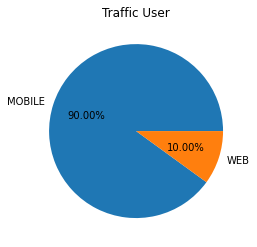

In [10]:
plt.pie(x = df_device['percentage'], labels = df_device['traffic_source'], autopct = '%.2f%%')
plt.title('Traffic User')
plt.show()

In [11]:
#The percentage portion device on booking
click[click['event_name'] == 'BOOKING']['traffic_source'].value_counts(normalize = True)

MOBILE    0.899918
WEB       0.100082
Name: traffic_source, dtype: float64

In [12]:
click[click['event_name'] == 'BOOKING'].groupby(['month_year'], as_index = False).agg({'event_name':'count'}).sort_values('event_name', ascending = False).head(10)

,month_year,event_name
29,05-2022,30084
23,04-2022,29237
17,03-2022,28801
36,06-2022,28587
5,01-2022,27276
73,12-2021,25677
11,02-2022,25448
43,07-2022,25162
67,11-2021,25063
61,10-2021,24675


In [13]:
booking_yty = click[click['event_name'] == 'BOOKING'].groupby('year', as_index = False)['event_name'].count().sort_values('year')
booking_yty

,year,event_name
0,2016,4833
1,2017,34111
2,2018,73127
3,2019,116794
4,2020,172908
5,2021,256214
6,2022,194595


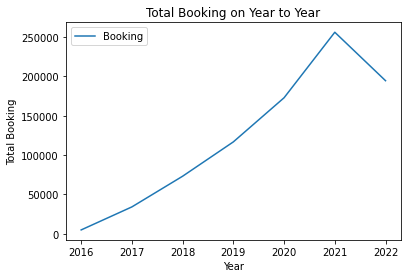

In [14]:
plt.plot('year', 'event_name', data = booking_yty, label = 'Booking')

plt.title('Total Booking on Year to Year')
plt.xlabel('Year')
plt.ylabel('Total Booking')
plt.legend()
plt.show()

In [15]:
# Total device user use on year to year
click[click['event_name'] == 'BOOKING'].groupby(['year', 'traffic_source'], as_index = False)['event_name'].count().sort_values('year', ascending = False)

,year,traffic_source,event_name
12,2022,MOBILE,175116
13,2022,WEB,19479
10,2021,MOBILE,230553
11,2021,WEB,25661
8,2020,MOBILE,155659
9,2020,WEB,17249
6,2019,MOBILE,104999
7,2019,WEB,11795
4,2018,MOBILE,65898
5,2018,WEB,7229


In [16]:
traffic_user_per_year = click.groupby(['year', 'traffic_source'], as_index = False)['event_name'].count().sort_values('year', ascending = False)
traffic_user_per_year

,year,traffic_source,event_name
12,2022,MOBILE,2695376
13,2022,WEB,297895
10,2021,MOBILE,3437818
11,2021,WEB,381863
8,2020,MOBILE,2311240
9,2020,WEB,257572
6,2019,MOBILE,1568989
7,2019,WEB,175632
4,2018,MOBILE,988365
5,2018,WEB,110949


In [18]:
year = traffic_user_per_year[['year']]
year.drop_duplicates('year', inplace = True)
year.sort_values('year', inplace = True)

mobile = traffic_user_per_year[traffic_user_per_year['traffic_source'] == 'MOBILE'][['event_name']].sort_values('event_name')
web = traffic_user_per_year[traffic_user_per_year['traffic_source'] == 'WEB'][['event_name']].sort_values('event_name')

mobile

,event_name
0,70917
2,475599
4,988365
6,1568989
8,2311240
12,2695376
10,3437818


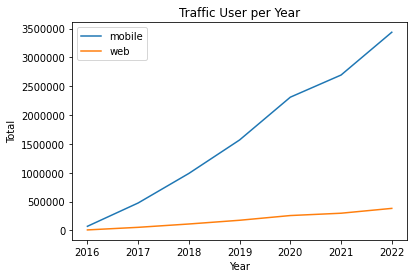

In [19]:
plt.plot(year, mobile, label = 'mobile')
plt.plot(year, web, label = 'web')

plt.title('Traffic User per Year')

plt.xlabel('Year')
plt.ylabel('Total')

plt.legend()

plt.ticklabel_format(style='plain')

plt.show()

In [35]:
word_df = pd.DataFrame(click['search_keywords'].value_counts()).reset_index().rename(columns={'search_keywords': 'total_keyword', 'index':'search_keywords'})

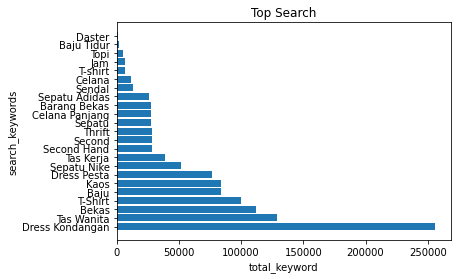

In [37]:
plt.barh('search_keywords', 'total_keyword', data = word_df )

plt.xlabel('total_keyword')
plt.ylabel('search_keywords')

plt.title('Top Search')

plt.show()